# APRENDIZAJE AUTOMÁTICO 1

Los datos más usados son los `datos tabulados` que se representan en tablas:
- cada **fila** es un **ejemplo**
- cada **columna** sin tratar es un **atributo** $\rightarrow$ *datos en crudo*
- cada **columna** tratada es una **serie**

## Tipos de datos:

Cada columna puede tener tipos de datos diferentes:
- atributos continuos $\rightarrow$ Son aquellos atributos que pueden tomar cualquier valor en un intervalo de $\mathbb R$.
- atrubutos discretos $\rightarrow$ Son aquellos atributos que pueden tomar solo un número finito de valores dentro de un intervalo $(a,b)$.
- atributos categóricos $\rightarrow$ Son aquellos atributos que pueden tomar sólo un número finito de valores dentro de un conjunto que puede no tener una relación de orden entre sus miembros.

Los `dtypes` de un dataframe pueden ser:
- `int64`: Números enteros
- `float64`: Números de punto flotante
- `object`: Tipo general para texto, o columnas mixtas de números y texto
- `bool`: Valores booleanos: True/False
- `datetime64`: Fecha y hora
- `timedelta[ns]`: Diferencias entre dos datetimes
- `category`: Lista finita de valores de texto

## Pasos a realizar para limpiar el `df`:

#### 1. Importar las librerías que se van a utilizar:

In [ ]:
import pandas as pd             # Manejo de datos
import numpy as np              # Manejo de arrays n-dimensionales y func. matemáticas
import scipy                    # Manejo de func. matemáticas y distrib. de probabilidad
#import sklearn                 # Biblioteca de ML
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import random                   # Generación aleatoria
import matplotlib.pyplot as plt # Generación de gráficos

#### 2. Abrir la `BD`

In [ ]:
fullSet = pd.read_csv('folder_name + file_name')
# fullSet = pd.read_csv('sample_data/california_housing_train.csv')

#### 3. Dividir la `BD` en `train` y `test` 
> _MUY IMPORTANTE NO TOCAR EL TEST UNA VEZ CREADO_

##### 3.1 Guardar el número de filas (`N`) y columnas (`D`) en variables

In [ ]:
N,D = fullSet.shape

##### 3.2 Hacer la división del `df` en `train` y `test` indicando el porcentaje de cada uno

> _En este caso va a ser 20% `test` y 80% `train`_

In [ ]:
fraction_test = 0.2                   # El 0.2 de las filas del df va a ser del test

idx = fullSet.index.tolist()          # Mete todos los índices del df en una lista
random.shuffle(idx)                   # Mezcla la lista con los índices del df antes de hacer la división para que sea más homogénea

N_test = int(N*fraction_test)         # Calcula el número de filas que se van a guardar en el conjunto de 'test'
testSet = fullSet.iloc[idx[:N_test]]
trainSet = fullSet.iloc[idx[N_test:]]

##### 3.3 Muestra el tamaño de cada muestra y guarda cada uno de los nuevos df en archivos diferentes

In [ ]:
print(f'El tamaño del conj. de entrenamiento es: ',trainSet.shape)
print(f'El tamaño del conj. de test es: ',testSet.shape)

Guardar los datos de entrenamiento:

In [ ]:
flag_save_test = True          # Guarda para el bucle de la división
if flag_save_test:
  train_folder = "....." #<- ruta de la carpeta, por ejemplo "sample_data/"
  train_name   = "....." #<- nombre del CSV donde guardamos testSet
  trainSet.to_csv(train_folder + train_name, dec='.', sep=';', header=True)

Guardar los datos de test:

In [ ]:
flag_save_test = True          # Guarda para el bucle de la división
if flag_save_test:
  test_folder = "....." #<- ruta de la carpeta, por ejemplo "sample_data/"
  test_name   = "....." #<- nombre del CSV donde guardamos testSet
  testSet.to_csv(test_folder + test_name, dec='.', sep=';', header=True)

#### 4. Codificación de los datos categóricos

##### _Creación del dataframe de ejemplo:_

In [ ]:
N = 10
df_categorico = pd.DataFrame({
    'Atributo 1': [random.choice(['hombre', 'mujer']) for _ in range(N)],
    'Atributo 2': [random.choice(['rojo', 'verde', 'azul']) for _ in range(N)],
}, dtype="category")

print(df_categorico)

##### 4.1 Asignación automática por Python

Los datos categóricos se tienen que cambiar a valores numéricos para poder trabajar con ellos de forma más cómoda.

Pandas permite codificar con enteros una Serie.<br>
Por ejemplo:  `df_categorico['Atributo 1'].cat.codes`

Si queremos codificar todos los atributos categóricos de un DataFrame debemos recorrer sus columnas ejecutando `cat.codes`.

Para saber a qué categoría se corresponde cada entero lo mejor es ir creando un diccionario al mismo tiempo. Para ello juntaremos códigos y categorías en la estructura de datos `dict` de Python.

In [ ]:
codes1 = df_categorico['Atributo 1'].cat.codes                  # Codifica cada valor de la serie 'Atributo 1'
code_to_categ1 = dict(zip(codes1,df_categorico['Atributo 1']))  # Recupera la categoría a partir del código asignado

codes2 = df_categorico['Atributo 2'].cat.codes                  # Codifica cada valor de la serie 'Atributo 2'
code_to_categ2 = dict(zip(codes2,df_categorico['Atributo 2']))  # Recupera la categoría a partir del código asignado

In [ ]:
print('Diccionario código->categoría: ',code_to_categ1)
print('Diccionario código->categoría: ',code_to_categ2)

##### 4.2 Asignación manual

In [ ]:
categorias1 = df_categorico['Atributo 1'].unique()                                                          # Indica cuántas categ. diferentes y cuáles hay en el df con '.unique'
categ_to_code1= {string: i for i, string in enumerate(categorias1)}                                         # Crea el diccionario con las relaciones de valores
categ1 = df_categorico['Atributo 1'].map(categ_to_code1)                                                    # Aplica el cambio de valor al df

categorias2 = ['blanco','amarillo','verde','cian','rosa','azul','morado','rojo','marrón','gris','negro']    # Lista de posibles dibujos que pueden aparecer
categ_to_code2= {string: i for i, string in enumerate(categorias2)}                                         # Recorre la lista y asocia un número a cada color y lo guarda en un diccionario
categ2 = df_categorico['Atributo 2'].map(categ_to_code2)                                                    # Aplica el cambio de valor al df

In [ ]:
print('Diccionario categoría->código: ',categ_to_code1)
print(categ1, "\n")

print('Diccionario categoría->código: ',categ_to_code2,)
print(categ2)

##### 4.3 Automatización

Estos métodos están orientados a Series, es decir a columnas. <br>
Si queremos cambiar todas las columnas categóricas por un código debemos hacerlo en un bucle PERO primero hay que identificar en cuales hay que actuar.

In [ ]:
# 1) averiguamos las columnas categóricas
cat_cols = df_categorico.select_dtypes(include='category').columns.tolist()
# 2) creamos un dataframe con las columnas categóricas pero sin filas
df_cat_coded = pd.DataFrame(columns=cat_cols)
# 3) creamos un bucle que las recorra y las codifique, a la vez que creamos una diccionario de diccionarios para descodificar en el futuro
dict_decode={}
for col in cat_cols:
  codes = df_categorico[col].cat.codes
  code_to_categ = dict(zip(codes,df_categorico[col]))
  df_cat_coded[col] = codes
  dict_decode[col] = code_to_categ

In [ ]:
print(df_cat_coded)
print(dict_decode)

##### 4.4 Codificación _One-hot_

En esta codificación se crea una columna extra por cada categoría e indica con `1` en aquel valor que sí lo cumple y con `0` el que no.

<u>_Ejemplo:_</u><br> Para el atributo "Color" con tres categorías _{Rojo, Verde, Azul}_ se crearían 3 columnas: "Rojo", "Verde" y "Azul".

In [ ]:
one_hot = pd.get_dummies(df_categorico['Atributo 1'])   #Crear un df nuevo únicamente con las nuevas series de datos
df = pd.concat([df_categorico, one_hot], axis=1)        # Unir el dataframe original con el dataframe codificado
df

##### 4.5 Librerías de codificación

En particular, en La biblioteca **SciKit-Learn** de Python podemos encontrar algunos métodos de codificación similares a los que hemos visto en Pandas. <br>
Conviene conocerlos pero no los utilizaremos hasta que no empezemos a aprender modelos.

| | |
|----|----|
| `preprocessing.LabelEncoder` | Encode target labels with value between 0 and n_classes-1 |
| `preprocessing.OneHotEncoder` | Encode categorical features as a one-hot numeric array |
| `preprocessing.OrdinalEncoder` | Encode categorical features as an integer array. |
| `preprocessing.TargetEncoder` |  	Target Encoder for regression and classification targets |

#### 5. Exploración de los datos (`INFO`)

##### 5.1 Descripción estadística básica:
- Tamaño del conjunto de datos (número de ejemplos (`filas`) y dimensionalidad (`columnas`)): $N=?, D=?$
- Localizar atributos **NO** numéricos y convertirlos
- Media y desviación estandard de cada atributo: $\mu(x_i)=?$, $\sigma_i(x_i)=?$ , para $i=1\ldots D$.
- Mediana de cada atributo: $Q_{50}(x_i)=?$
- Moda de cada atributo: $\text{Moda}(x_i) = ?$
- Máx. y mín. de cada atributo: $\max(x_i)= ?$  , $\min(x_i)= ?$

Opción 1: ir  viendo los datos de cada atributo por separado y guardándolos en variables diferentes

In [ ]:
N,D = trainSet.shape                                # Tamaño del df
trainSet.dtypes                                     # Tipo de dato de cada atributo
media = trainSet['atributo'].mean()                 # Media
desviacion_estandar = trainSet['atributo'].std()    # Desviación estandar
mediana = trainSet['atributo'].median()             # Mediana
moda = trainSet['atributo'].mode()[0]               # mode() devuelve una serie porque puede tener más de una moda, así que tomamos el primer elemento (Pero también se puede guardar toda la lista)
maximo = trainSet['atributo'].max()                 # Máximo
minimo = trainSet['atributo'].min()                 # Mínimo

Opción 2: ver toda la información diréctamente sin guardar cada dato

In [ ]:
print(trainSet.info())              # Indica el tamaño, los tipos de datos y cuántos son 'Na' de cada atributo
trainSet.describe()                 # Indica la descripción estadística básica excepto la moda de cada atributo en forma de tabla
trainSet.mode(axis=0, dropna=False) # Devuelve una tabla con las modas de cada atributo

##### 5.2 Visualización de la distribución de los datos (`Cuidado`)

> Hay que intentar `realizar los ejercicios sin visualizar los datos` porque va a haber ocasiones que nuestra `base de datos` sea tan `grande` que sea imposible abarcarlo todo

Pero para `algunos casos` viene `bien` visualizar los datos, es por ello que hacemos uso de las gráficas.
El siguiente código compara cada una de los atributos de la tabla con el resto.

In [ ]:
pd.plotting.scatter_matrix(trainSet, alpha=0.1)

#### 6. Procesado de datos: Tratamiento de valores perdidos (`Na`)

Para tratar los valores perdidos debemos:
1. Averiguar dónde están
2. Valorar si rellenamos los huecos (imputación de valores perdidos) <br>
o tomamos otra decisión como eliminar el ejemplo el atributo.
3. Opcionalmente se puede añadir un nueva columna a la derecha de aquella donde se hayan imputado valores, marcando las celdas donde ha habido imputación como muestra la figura de abajo.

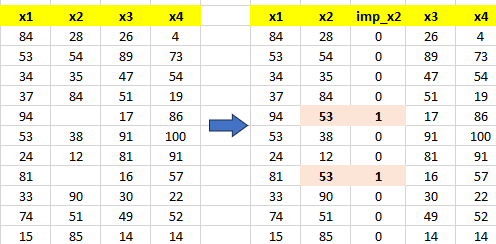

##### 6.1 Localización de valores perdidos (NA):

`Si los valores nulos (NA) no están indicados como tal se puede usar el siguiente comando para cambiarlos a NA.`<br>
En el siguiente caso los valores se indican como `'?'`

In [ ]:
trainSet = trainSet.replace('?', pd.NA)

Los métodos `isnull()` e `isna()` de la librería Pandas devuelven un booleano (True o False) por cada celda del dataframe con un valor 'NA'.
- No existe ninguna diferencia entre ambos métodos. Son idénticos.

In [ ]:
missing_data = trainSet.isna()

Ahora hay que ver cuántos valores 'NA' faltan en cada columna y cada fila:

In [ ]:
missing_values_per_column = missing_data.sum(axis=0)    # 'NA' por cada columna
missing_values_per_row = missing_data.sum(axis=1)       # 'NA' por cada fila

mask_mayorq0 = missing_values_per_column > 0            # Crea una máscara de Pandas para indicar si hay columnas con NA
mask_mayorq1 = missing_values_per_row > 0               # Crea una máscara de Pandas para indicar si hay filas con NA

print('Columnas con valores nulos', missing_values_per_column[mask_mayorq0], '\n')
print('Columnas con valores nulos', missing_values_per_row[mask_mayorq1], '\n')

Para ver mejor cuantos valores faltantes hay en cada fila podemos ejecutar el siguiente código que nos indicará cuantos atributos faltantes (columna de la izquierda) tienen _tantos núm._ de filas (columnas de la derecha):

In [ ]:
missing_count = missing_values_per_row.value_counts().sort_index()
print(missing_count)

##### 6.2 Eliminación de filas y columnas con número `excesivo` de atributos perdidos:

> Eliminación de filas con número `excesivo` de atributos perdidos:

In [ ]:
missing_count.index[-1]                                             # Calcular la cantidad máxima de valores nulos por fila
mask_toDrop = missing_values_per_row >= missing_count.index[-1]     # Filtro que busca las filas con el número de valores perdidos máximo
drop_list = missing_values_per_row[mask_toDrop].index.tolist()      # Crea una lista de índices de las filas que cumplen con la condición
df.drop(drop_list, inplace=True)                                    # Eliminar las filas guardadas en 'drop_list' del DataFrame original

print(f'Tras eliminar las filas con más NaN, tenemos una tabla de tamaño:', df.shape)

> 6.2.2 Eliminación de columnas con número `excesivo` de atributos perdidos:

In [ ]:
missing_count = missing_values_per_column.value_counts().sort_index()
print(missing_count)                                                    # Visualización de cantidad de datos perdidos por columna

missing_count.index[-1]                                                 # Calcular la cantidad máxima de valores nulos por fila
mask_toDrop = missing_values_per_column >= missing_count.index[-1]      # Filtro que busca las filas con el número de valores perdidos máximo
drop_list = missing_values_per_column[mask_toDrop].index.tolist()       # Crea una lista de índices de las filas que cumplen con la condición
df.drop(drop_list, inplace=True)                                        # Eliminar las filas guardadas en 'drop_list' del DataFrame original, al usar implace no hace falta poner 'df = ...'

print(f'Tras eliminar las filas con más NaN, tenemos una tabla de tamaño:', df.shape)

##### 6.3 `IMPUTACIÓN UNIVARIADA`

Añadir un valor al NA en función del resto de valores de la lista:<br>
(se puede añadir una columna indicando si se ha modificado el dato o no)

Este estadístico puede ser:
- la **media**, si los valores de ese atributo están distribuidos según una normal.
- la **mediana**, si no lo están. `Además la mediana es mejor opción si hubiera valores muy extremos dentro de esa columna` (valores *outliers*).
- el **valor más repetido** (moda), si se trata de una columna de valores categóricos.

En el siguiente código puedes ver un ejemplo de cómo funciona:

In [ ]:
df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [None, 6, 7, 8]})         # Crea un nuevo data frame con valores faltantes
df.fillna(df.median(axis=0),inplace=True)                               # A los valores faltantes les dá el valor de la mediana
df

Posibles problemas:
- Si el valor depende del tiempo (el pulso por ejemplo $\rightarrow$ función continua) se puede usar la función `interpolate()` que rellena el dato según los que tenga a su alrededor, para no tener saltos en la función de datos.

- Si un dato depende del resto: falta el género del paciente, si se pone el más repetido (mujer) y se va a operar de fimosis es imposible.

##### 6.4 `IMPUTACIÓN MULTIVARIADA`

Calcula el valor imputado en función del resto de atributos. Estima el valor perdido mediante una regresión (técnica de machine learning supervisada)

#### 7. Ingeniaría de características

Lo que se hace es relacionar columnas entre sí, haciendo crecer el `df` en columnas. Al aumentar el número de dimensiones (columnas) es más fácil crear una línea recta que divida el conjunto de datos.